In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
pd.set_option('display.precision',4)

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

#### The dataset has been created using the tables from:

###### Data Columns for 2011 are listed below, same number of columns for 2016 
* 2011_Mortgate_Count	
* 2011_New_House_Price	
* 2011_Second_Hand_Price	
* 2011_Sum_of_Price	
* 2011_Male_Population	
* 2011_Female_Population	
* 2011_Total_Population	
* 2011_Migration_Population	
* 2011_LA_Arrears	
* 2011_1 - 14 years	
* 2011_15 - 19 years	
* 2011_20 - 24 years	
* 2011_25 - 29 years	
* 2011_30 - 34 years	
* 2011_35 - 44 years	
* 2011_45 - 54 years	
* 2011_55 - 64 years	
* 2011_65 - 74 years	
* 2011_75 years and over	
* 2011_employment	
* 2011_Married_First_Marriage	
* 2011_Divorsed
* 2011_AVG_Interest_Rate


* National average mortgage interest rates (from 2011 - 2017) -- we need to calculate the difference every year
* Sum of House Prices (2011 -2017) -- we need to calculate the difference every year
* Mortgage Arrears by county (2011 -2017): This is important to make the arrears prediction
* Loan Paid by an individual for both new and second-hand property (2011-2017)
* Population by gender (2011 and 2016 )
* Repossessions (2011 and 2016 )
* Loans approved (2011 and 2016 )
* Principal economic status of the population living in the counties
* Commuter details
* Average Number of Persons per Private Household 2011 to 2016 by County
* Detailed Marital Status
* Type of Households
* Aggregate Town or Rural Area, County of Usual Residence, Nationality





### Data Preparation Notes:
* Property register data cleaning
* Using MID function in excel extracted date for pivot table to filter out data for each year. 
* Teach/Árasán Cónaithe Atháimhe 
###### UPDATED TO 
* Second-Hand Dwelling house /Apartment

* Teach/Árasán Cónaithe Nua
* Teach/?ras?n C?naithe Nua
###### UPDATED TO 
* New Dwelling house /Apartment

* Male female population:
* County data was not in alphabetical order when downloaded so it has to be sorted ascending order before the data is copied over.

* Migration data/Arrears Data/Marital Status data

##### City
* Cork City and Cork County details are merged for CORK count 
##### Below listed are merged for DUBLIN count
    * Dublin City
    * Dún Laoghaire-Rathdown
    * Fingal
    * South Dublin

##### Below listed are merged for GALWAY count
    * Galway City
    * Galway County


##### INTEREST RATE
* Average calculated from 12 months. 

    

In [2]:
df = pd.read_csv("mortgage_arrears.csv")

In [3]:
print ("\n\n---------------------")
print ("DATA SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)



---------------------
DATA SET INFORMATION
---------------------
Shape of training set: (27, 284) 

Column Headers: ['County', '2011_Mortgate_Count', '2011_New_House_Price', '2011_Second_Hand_Price', '2011_Sum_of_Price', '2011_Male_Population', '2011_Female_Population', '2011_Total_Population', '2011_Migration_Population', '2011_LA_Arrears', '2011_Loans Approved', '2011_Loans_Paid', '2011_1 - 14 years', '2011_15 - 19 years', '2011_20 - 24 years', '2011_25 - 29 years', '2011_30 - 34 years', '2011_35 - 44 years', '2011_45 - 54 years', '2011_55 - 64 years', '2011_65 - 74 years', '2011_75 years and over', '2011_employment', '2011_Married_First_Marriage', '2011_Divorsed', '2011_AVG_Interest_Rate', '2012_Mortgate_Count', '2012_New_House_Price', '2012_Second_Hand_Price', '2012_Sum_of_Price', '2012_AVG_Interest_Rate', '2012_LA_Arrears', '2012_Loans Approved', '2012_Loans_Paid', '2013_Mortgate_Count', '2013_New_House_Price', '2013_Second_Hand_Price', '2013_Sum_of_Price', '2013_AVG_Interest_Ra

In [4]:
import re
missing_values = []
nonumeric_values = []

print ("DATA SET INFORMATION")
print ("========================\n")

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


DATA SET INFORMATION

'County' has 27 unique values
~~Listing up to 10 unique values~~
['Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway' 'Kerry'
 'Kildare' 'Kilkenny']

-----------------------------------------------------------------------

'2011_Mortgate_Count' has 27 unique values
~~Listing up to 10 unique values~~
[ 232  302  506 2269  634 6934  948  627 1045  343]

-----------------------------------------------------------------------

'2011_New_House_Price' has 27 unique values
~~Listing up to 10 unique values~~
[1.54692467e+07 2.46737427e+07 2.03698313e+07 1.30779202e+08
 3.43808982e+07 3.33210699e+08 5.49165761e+07 3.09137584e+07
 8.43134697e+07 1.42678028e+07]

-----------------------------------------------------------------------

'2011_Second_Hand_Price' has 27 unique values
~~Listing up to 10 unique values~~
[2.49027193e+07 1.83524820e+07 6.86857598e+07 3.91481730e+08
 6.19661468e+07 1.97594098e+09 1.56777109e+08 8.70384143e+07
 1.66707179e+08 5.77318140e+07]



##### 26 in the Republic of Ireland and 6 in Northern Ireland .
This project is about Republic of Ireland
##### State

In [5]:
#list(df.columns)

###### Create new features using the difference between yearly and 5 yearly data from census

In [6]:
#Mortgage Count
df['diff_mortgage_count_1'] = df['2012_Mortgate_Count'] - df['2011_Mortgate_Count']
df['diff_mortgage_count_2'] = df['2013_Mortgate_Count'] - df['2012_Mortgate_Count']
df['diff_mortgage_count_3'] = df['2014_Mortgate_Count'] - df['2013_Mortgate_Count']
df['diff_mortgage_count_4'] = df['2015_Mortgate_Count'] - df['2014_Mortgate_Count']
df['diff_mortgage_count_5'] = df['2016_Countof_mortgages'] - df['2015_Mortgate_Count'] # Different column name
df['diff_mortgage_count_6'] = df['2017_Mortgate_Count'] - df['2016_Countof_mortgages']


In [7]:
#New House Prices
df['diff_new_house_price_1'] = df['2012_New_House_Price'] - df['2011_New_House_Price']
df['diff_new_house_price_2'] = df['2013_New_House_Price'] - df['2012_New_House_Price']
df['diff_new_house_price_3'] = df['2014_New_House_Price'] - df['2013_New_House_Price']
df['diff_new_house_price_4'] = df['2015_New_House_Price'] - df['2014_New_House_Price']
df['diff_new_house_price_5'] = df['2016_New_House_Price '] - df['2015_New_House_Price'] # Extra space in the column name
df['diff_new_house_price_6'] = df['2017_New_House_Price'] - df['2016_New_House_Price ']



In [8]:
#Second House Prices
df['diff_secondhand_house_price_1'] = df['2012_Second_Hand_Price'] - df['2011_Second_Hand_Price']
df['diff_secondhand_house_price_2'] = df['2013_Second_Hand_Price'] - df['2012_Second_Hand_Price']
df['diff_secondhand_house_price_3'] = df['2014_Second_Hand_Price'] - df['2013_Second_Hand_Price']
df['diff_secondhand_house_price_4'] = df['2015_Second_Hand_Price'] - df['2014_Second_Hand_Price']
df['diff_secondhand_house_price_5'] = df['2016_Second_Hand_Price'] - df['2015_Second_Hand_Price']
df['diff_secondhand_house_price_6'] = df['2017_Second_Hand_Price'] - df['2016_Second_Hand_Price']

In [9]:
#Sum House Prices
df['diff_sum_house_price_1'] = df['2012_Sum_of_Price'] - df['2011_Sum_of_Price']
df['diff_sum_house_price_2'] = df['2013_Sum_of_Price'] - df['2012_Sum_of_Price']
df['diff_sum_house_price_3'] = df['2014_Sum_of_Price'] - df['2013_Sum_of_Price']
df['diff_sum_house_price_4'] = df['2015_Sum_of_Price'] - df['2014_Sum_of_Price']
df['diff_sum_house_price_5'] = df['2016_Sum_of_Price'] - df['2015_Sum_of_Price']
df['diff_sum_house_price_6'] = df['2017_Sum_of_Price'] - df['2016_Sum_of_Price']

In [10]:
#Average Interest Rate
df['diff_interestrate_1'] = df['2012_AVG_Interest_Rate'] - df['2011_AVG_Interest_Rate']
df['diff_interestrate_2'] = df['2013_AVG_Interest_Rate'] - df['2012_AVG_Interest_Rate']
df['diff_interestrate_3'] = df['2014_AVG_Interest_Rate'] - df['2013_AVG_Interest_Rate']
df['diff_interestrate_4'] = df['2015_AVG_Interest_Rate'] - df['2014_AVG_Interest_Rate']
df['diff_interestrate_5'] = df['2016_AVG_Interest_Rate'] - df['2015_AVG_Interest_Rate']
df['diff_interestrate_6'] = df['2017_AVG_Interest_Rate'] - df['2016_AVG_Interest_Rate']

In [11]:
#Loan Arrears
df['diff_loanarrears_1'] = df['2012_LA_Arrears'] - df['2011_LA_Arrears']
df['diff_loanarrears_2'] = df['2013_LA_Arrears'] - df['2012_LA_Arrears']
df['diff_loanarrears_3'] = df['2014_LA_Arrears'] - df['2013_LA_Arrears']
df['diff_loanarrears_4'] = df['2015_LA_Arrears'] - df['2014_LA_Arrears']
df['diff_loanarrears_5'] = df['2016_LA_Arrears'] - df['2015_LA_Arrears']
df['diff_loanarrears_6'] = df['2017_LA_Arrears'] - df['2016_LA_Arrears']

In [12]:
#Loans Approved
df['diff_loanapproved_1'] = df['2012_Loans Approved'] - df['2011_Loans Approved']
df['diff_loanapproved_2'] = df['2013_Loans Approved'] - df['2012_Loans Approved']
df['diff_loanapproved_3'] = df['2014_Loans Approved'] - df['2013_Loans Approved']
df['diff_loanapproved_4'] = df['2015_Loans Approved'] - df['2014_Loans Approved']
df['diff_loanapproved_5'] = df['2016_Loans_Approved'] - df['2015_Loans Approved']
df['diff_loanapproved_6'] = df['2017_Loans Approved'] - df['2016_Loans_Approved']

In [13]:
#Loans Paid
df['diff_loanpaid_1'] = df['2012_Loans_Paid'] - df['2011_Loans_Paid']
df['diff_loanpaid_2'] = df['2013_Loans_Paid'] - df['2012_Loans_Paid']
df['diff_loanpaid_3'] = df['2014_Loans_Paid'] - df['2013_Loans_Paid']
df['diff_loanpaid_4'] = df['2015_Loans_Paid'] - df['2014_Loans_Paid']
df['diff_loanpaid_5'] = df['2016_Loans_Paid'] - df['2015_Loans_Paid']
df['diff_loanpaid_6'] = df['2017_Loans_Paid'] - df['2016_Loans_Paid']


###### Diversity in county according to Sex. Take a difference between the 5 years

In [14]:

df['2011_diversity_bothsexes'] = df[['2011_African-Both sexes',
'2011_All nationalities-Both sexes',
'2011_American (US)-Both sexes', 
 '2011_Brazilian-Both sexes',
 '2011_French-Both sexes',
 '2011_German-Both sexes',
 '2011_Indian-Both sexes',
 '2011_Irish-Both sexes', 
 '2011_Italian-Both sexes',
 '2011_Latvian-Both sexes',
 '2011_Lithuanian-Both sexes', 
 '2011_Not stated, including no nationality-Both sexes', 
 '2011_Other American-Both sexes', 
 '2011_Other Asian-Both sexes', 
 '2011_Other EU28-Both sexes', 
 '2011_Other European-Both sexes',
 '2011_Other nationalities-Both sexes',
 '2011_Polish-Both sexes', 
 '2011_Romanian-Both sexes', 
 '2011_Spanish-Both sexes', 
 '2011_UK-Both sexes']].sum(axis = 1)

In [15]:

df['2016_diversity_bothsexes'] = df[['2016_African-Both sexes',
'2016_All nationalities-Both sexes',
'2016_American (US)-Both sexes', 
 '2016_Brazilian-Both sexes',
 '2016_French-Both sexes',
 '2016_German-Both sexes',
 '2016_Indian-Both sexes',
 '2016_Irish-Both sexes', 
 '2016_Italian-Both sexes',
 '2016_Latvian-Both sexes',
 '2016_Lithuanian-Both sexes', 
 '2016_Not stated, including no nationality-Both sexes', 
 '2016_Other American-Both sexes', 
 '2016_Other Asian-Both sexes', 
 '2016_Other EU28-Both sexes', 
 '2016_Other European-Both sexes',
 '2016_Other nationalities-Both sexes',
 '2016_Polish-Both sexes', 
 '2016_Romanian-Both sexes', 
 '2016_Spanish-Both sexes', 
 '2016_UK-Both sexes']].sum(axis = 1)

In [16]:
df['diff_diversity_bothsexes'] = df['2016_diversity_bothsexes'] - df['2011_diversity_bothsexes']

In [17]:
#df['diff_diversity_bothsexes']

In [18]:
df['2011_diversity_female'] = df[['2011_African-Female',
'2011_All nationalities-Female',
'2011_American (US)-Female',
'2011_Brazilian-Female',
'2011_French-Female',
'2011_German-Female',
 '2011_Indian-Female',
'2011_Irish-Female',
 '2011_Italian-Female',
 '2011_Latvian-Female',
'2011_Lithuanian-Female',
'2011_Not stated, including no nationality-Female',
'2011_Other American-Female',
 '2011_Other Asian-Female',
'2011_Other EU28-Female',
 '2011_Other European-Female',
'2011_Other nationalities-Female',
'2011_Polish-Female',
'2011_Romanian-Female',
'2011_Spanish-Female',
 '2011_UK-Female']].sum(axis = 1)

In [19]:
df['2016_diversity_female'] = df[['2016_African-Female',
'2016_All nationalities-Female',
'2016_American (US)-Female',
'2016_Brazilian-Female',
'2016_French-Female',
'2016_German-Female',
 '2016_Indian-Female',
'2016_Irish-Female',
 '2016_Italian-Female',
 '2016_Latvian-Female',
'2016_Lithuanian-Female',
'2016_Not stated, including no nationality-Female',
'2016_Other American-Female',
 '2016_Other Asian-Female',
'2016_Other EU28-Female',
 '2016_Other European-Female',
'2016_Other nationalities-Female',
'2016_Polish-Female',
'2016_Romanian-Female',
'2016_Spanish-Female',
 '2016_UK-Female']].sum(axis = 1)

In [20]:
df['diff_diversity_female'] = df['2016_diversity_female'] - df['2011_diversity_female']

In [21]:
df['2011_diversity_male'] = df[[ '2011_African-Male',
'2011_All nationalities-Male',
 '2011_American (US)-Male',
 '2011_Brazilian-Male',
  '2011_French-Male',
 '2011_German-Male',
 '2011_Indian-Male',
'2011_Irish-Male',
 '2011_Italian-Male',
 '2011_Latvian-Male',
 '2011_Lithuanian-Male',
 '2011_Not stated, including no nationality-Male',
'2011_Other American-Male',
'2011_Other Asian-Male',
'2011_Other EU28-Male',
 '2011_Other European-Male',
 '2011_Other nationalities-Male',
'2011_Polish-Male',
'2011_Romanian-Male',
'2011_Spanish-Male',
 '2011_UK-Male']].sum(axis = 1)

In [22]:
df['2016_diversity_male'] = df[[ '2016_African-Male',
'2016_All nationalities-Male',
 '2016_American (US)-Male',
 '2016_Brazilian-Male',
  '2016_French-Male',
 '2016_German-Male',
 '2016_Indian-Male',
'2016_Irish-Male',
 '2016_Italian-Male',
 '2016_Latvian-Male',
 '2016_Lithuanian-Male',
 '2016_Not stated, including no nationality-Male',
'2016_Other American-Male',
'2016_Other Asian-Male',
'2016_Other EU28-Male',
 '2016_Other European-Male',
 '2016_Other nationalities-Male',
'2016_Polish-Male',
'2016_Romanian-Male',
'2016_Spanish-Male',
 '2016_UK-Male']].sum(axis = 1)

In [23]:
df['diff_diversity_male'] = df['2016_diversity_male'] - df['2011_diversity_male']

In [24]:
df['diff_male_population'] = df['2016_Male_Population'] - df['2011_Male_Population']

In [25]:
df['diff_female_population'] = df['2016_Female_Population'] - df['2011_Female_Population']

In [26]:
df['diff_total_population'] = df['2016_Total_Population'] - df['2011_Total_Population']

In [27]:
df['diff_migration_population'] = df['2016_Migration_Population'] - df['2011_Migration_Population']

In [28]:
df['diff_1-14years_population'] = df['2016_1 - 14 years'] -df['2011_1 - 14 years']
df['diff_15-19years_population'] = df['2016_15 - 19 years'] -df['2011_15 - 19 years']
df['diff_20-24years_population'] = df['2016_20 - 24 years'] -df['2011_20 - 24 years']
df['diff_25-29years_population'] = df['2016_25 - 29 years'] -df['2011_25 - 29 years']
df['diff_30-34years_population'] = df['2016_30 - 34 years'] -df['2011_30 - 34 years']
df['diff_35-44years_population'] = df['2016_35 - 44 years'] -df['2011_35 - 44 years']
df['diff_45-54years_population'] = df['2016_45 - 54 years'] -df['2011_45 - 54 years']
df['diff_55-64years_population'] = df['2016_55 - 64 years'] -df['2011_55 - 64 years']
df['diff_65-74years_population'] = df['2016_65 - 74 years'] -df['2011_65 - 74 years']
df['diff_75years_over_population'] = df['2016_75 years and over'] -df['2011_75 years and over']

In [29]:
#Employment
df['diff_employment'] = df['2016_employment'] - df['2011_employment']
df['diff_average'] = df['Average of 2016'] - df['Average of 2011']
df['diff_All persons aged 15 years and over'] = df['2016_All persons aged 15 years and over'] - df['2011_All persons aged 15 years and over']
df['diff_Employer or own account worker'] = df['2016_Employer or own account worker'] - df['2011_Employer or own account worker']
df['diff_Employee'] = df['2016_Employee'] - df['2011_Employee']
df['diff_Assisting_relative'] = df['2016_Assisting_relative'] - df['2011_Assisting_relative']
df['diff_Unemployed looking for first regular job'] = df['2016_Unemployed looking for first regular job'] - df['2011_Unemployed looking for first regular job']
df['diff_Unemployed having lost or given up previous job'] = df['2016_Unemployed having lost or given up previous job'] - df['2011_Unemployed having lost or given up previous job']
df['diff_Student'] = df['2016_Student'] - df['2011_Student']
df['diff_Looking after home/family'] = df['2016_Looking after home/family'] - df['2011_Looking after home/family']
df['diff_Retired'] = df['2016_Retired'] - df['2011_Retired']
df['diff_Unable to work due to permanent sickness or disability'] = df['2016_Unable to work due to permanent sickness or disability'] - df['2011_Unable to work due to permanent sickness or disability']
df['diff_Other economic status'] = df['2016_Other economic status'] - df['2011_Other economic status']

In [30]:
#martital Status
df['diff_Married_First_Marriage'] = df['2016_Married_First_Marriage'] - df['2011_Married_First_Marriage']
df['diff_divorced'] = df['2016_Divorsed'] - df['2011_Divorsed']
df['diff_Same_Sex_Civil Partners'] = df['2016_Same_Sex_Civil Partners'] - df['2011_Same_Sex_Civil Partners']
df['diff_Remarried'] = df['2016_Remarried'] - df['2011_Remarried']
df['diff_Seperated'] = df['2016_Seperated'] - df['2011_Seperated']
df['diff_Single'] = df['2016_Single'] - df['2011_Single']
df['diff_Widowed'] = df['2016_Widowed'] - df['2011_Widowed']
df['diff_Remarried'] = df['2016_Remarried'] - df['2011_Remarried']



In [31]:
#Commmuter Information
df['diff_all_depature_timeAll_Persons'] = df['2016_all_depature_timeAll_Persons'] - df['2011_all_depature_timeAll_Persons']
df['diff_all_depature_time_Children at school aged between 5 and 12 years'] = df['2016_all_depature_time_Children at school aged between 5 and 12 years'] - df['2011_all_depature_time_Children at school aged between 5 and 12 years']
df['diff_all_depature_time_Students at school or college aged between 13 and 18 years'] = df['2016_all_depature_time_Students at school or college aged between 13 and 18 years'] - df['2011_all_depature_time_Students at school or college aged between 13 and 18 years']
df['diff_all_depature_time_Students at school or college aged 19 years and over'] = df['2016_all_depature_time_Students at school or college aged 19 years and over'] - df['2011_all_depature_time_Students at school or college aged 19 years and over']
df['diff_all_depature_time_Population aged 15 years and over at work'] = df['2016_all_depature_time_Population aged 15 years and over at work'] - df['2011_all_depature_time_Population aged 15 years and over at work']

In [32]:
#Type of house
df['diff_AllPrivate'] = df['2016_AllPrivate'] - df['2011_AllPrivate']


In [33]:
df

,County,2011_Mortgate_Count,2011_New_House_Price,2011_Second_Hand_Price,2011_Sum_of_Price,2011_Male_Population,2011_Female_Population,2011_Total_Population,2011_Migration_Population,2011_LA_Arrears,2011_Loans Approved,2011_Loans_Paid,2011_1 - 14 years,2011_15 - 19 years,2011_20 - 24 years,2011_25 - 29 years,2011_30 - 34 years,2011_35 - 44 years,2011_45 - 54 years,2011_55 - 64 years,2011_65 - 74 years,2011_75 years and over,2011_employment,2011_Married_First_Marriage,2011_Divorsed,2011_AVG_Interest_Rate,2012_Mortgate_Count,2012_New_House_Price,2012_Second_Hand_Price,2012_Sum_of_Price,2012_AVG_Interest_Rate,2012_LA_Arrears,2012_Loans Approved,2012_Loans_Paid,2013_Mortgate_Count,2013_New_House_Price,2013_Second_Hand_Price,2013_Sum_of_Price,2013_AVG_Interest_Rate,2013_LA_Arrears,2013_Loans Approved,2013_Loans_Paid,2014_Mortgate_Count,2014_New_House_Price,2014_Second_Hand_Price,2014_Sum_of_Price,2014_AVG_Interest_Rate,2014_LA_Arrears,2014_Loans Approved,2014_Loans_Paid,2015_Mortgate_Count,2015_New_House_Price,2015_Second_Hand_Price,2015_Sum_of_Price,2015_AVG_Interest_Rate,2015_LA_Arrears,2015_Loans Approved,2015_Loans_Paid,2016_Countof_mortgages,2016_New_House_Price,2016_Second_Hand_Price,2016_Sum_of_Price,2016_Male_Population,2016_Female_Population,2016_Total_Population,2016_Migration_Population,2016_LA_Arrears,2016_Loans_Approved,2016_Loans_Paid,2016_1 - 14 years,2016_15 - 19 years,2016_20 - 24 years,2016_25 - 29 years,2016_30 - 34 years,2016_35 - 44 years,2016_45 - 54 years,2016_55 - 64 years,2016_65 - 74 years,2016_75 years and over,2016_employment,2016_Married_First_Marriage,2016_Divorsed,2016_AVG_Interest_Rate,2017_Mortgate_Count,2017_New_House_Price,2017_Second_Hand_Price,2017_Sum_of_Price,2017_AVG_Interest_Rate,2017_LA_Arrears,2017_Loans Approved,2017_Loans_Paid,2011_Forced,2011_Voluntary,2012_Forced,2012_Voluntary,2013_Forced,2013_Voluntary,2014_Forced,2014_Voluntary,2015_Forced,2015_Voluntary,2016_Forced,2017_Voluntary,2017_Forced,2017_Voluntary.1,2012_Employees,2013_Employees,2014_Employees,2015_Employees,2016_Employees,Average of 2011,Average of 2016,2011_Same_Sex_Civil Partners,2016_Same_Sex_Civil Partners,2011_Remarried,2016_Remarried,2011_Seperated,2016_Seperated,2011_Single,2016_Single,2011_Widowed,2016_Widowed,2011_AllPrivate,2016_AllPrivate,2011_Permanent_Private,2016_Temporary_Private,2011_African-Both sexes,2011_African-Female,2011_African-Male,2011_All nationalities-Both sexes,2011_All nationalities-Female,2011_All nationalities-Male,2011_American (US)-Both sexes,2011_American (US)-Female,2011_American (US)-Male,2011_Brazilian-Both sexes,2011_Brazilian-Female,2011_Brazilian-Male,2011_French-Both sexes,2011_French-Female,2011_French-Male,2011_German-Both sexes,2011_German-Female,2011_German-Male,2011_Indian-Both sexes,2011_Indian-Female,2011_Indian-Male,2011_Irish-Both sexes,2011_Irish-Female,2011_Irish-Male,2011_Italian-Both sexes,2011_Italian-Female,2011_Italian-Male,2011_Latvian-Both sexes,2011_Latvian-Female,2011_Latvian-Male,2011_Lithuanian-Both sexes,2011_Lithuanian-Female,2011_Lithuanian-Male,"2011_Not stated, including no nationality-Both sexes","2011_Not stated, including no nationality-Female","2011_Not stated, including no nationality-Male",2011_Other American-Both sexes,2011_Other American-Female,2011_Other American-Male,2011_Other Asian-Both sexes,2011_Other Asian-Female,2011_Other Asian-Male,2011_Other EU28-Both sexes,2011_Other EU28-Female,2011_Other EU28-Male,2011_Other European-Both sexes,2011_Other European-Female,2011_Other European-Male,2011_Other nationalities-Both sexes,2011_Other nationalities-Female,2011_Other nationalities-Male,2011_Polish-Both sexes,2011_Polish-Female,2011_Polish-Male,2011_Romanian-Both sexes,2011_Romanian-Female,2011_Romanian-Male,2011_Spanish-Both sexes,2011_Spanish-Female,2011_Spanish-Male,2011_UK-Both sexes,2011_UK-Female,2011_UK-Male,2016_African-Both sexes,2016_African-Female,2016_African-Male,2016_All nationalities-Both sexes,2016_All nationalities-Female,2016_Al

In [34]:
df.shape

(27, 381)

In [35]:
list(df.columns)

['County',
 '2011_Mortgate_Count',
 '2011_New_House_Price',
 '2011_Second_Hand_Price',
 '2011_Sum_of_Price',
 '2011_Male_Population',
 '2011_Female_Population',
 '2011_Total_Population',
 '2011_Migration_Population',
 '2011_LA_Arrears',
 '2011_Loans Approved',
 '2011_Loans_Paid',
 '2011_1 - 14 years',
 '2011_15 - 19 years',
 '2011_20 - 24 years',
 '2011_25 - 29 years',
 '2011_30 - 34 years',
 '2011_35 - 44 years',
 '2011_45 - 54 years',
 '2011_55 - 64 years',
 '2011_65 - 74 years',
 '2011_75 years and over',
 '2011_employment',
 '2011_Married_First_Marriage',
 '2011_Divorsed',
 '2011_AVG_Interest_Rate',
 '2012_Mortgate_Count',
 '2012_New_House_Price',
 '2012_Second_Hand_Price',
 '2012_Sum_of_Price',
 '2012_AVG_Interest_Rate',
 '2012_LA_Arrears',
 '2012_Loans Approved',
 '2012_Loans_Paid',
 '2013_Mortgate_Count',
 '2013_New_House_Price',
 '2013_Second_Hand_Price',
 '2013_Sum_of_Price',
 '2013_AVG_Interest_Rate',
 '2013_LA_Arrears',
 '2013_Loans Approved',
 '2013_Loans_Paid',
 '2014_Mort

In [36]:
train = df[['County','diff_mortgage_count_1',
 'diff_mortgage_count_2',
 'diff_mortgage_count_3',
 'diff_mortgage_count_4',
 'diff_mortgage_count_5',
 'diff_mortgage_count_6',
 'diff_new_house_price_1',
 'diff_new_house_price_2',
 'diff_new_house_price_3',
 'diff_new_house_price_4',
 'diff_new_house_price_5',
 'diff_new_house_price_6',
 'diff_secondhand_house_price_1',
 'diff_secondhand_house_price_2',
 'diff_secondhand_house_price_3',
 'diff_secondhand_house_price_4',
 'diff_secondhand_house_price_5',
 'diff_secondhand_house_price_6',
 'diff_sum_house_price_1',
 'diff_sum_house_price_2',
 'diff_sum_house_price_3',
 'diff_sum_house_price_4',
 'diff_sum_house_price_5',
 'diff_sum_house_price_6',
 'diff_interestrate_1',
 'diff_interestrate_2',
 'diff_interestrate_3',
 'diff_interestrate_4',
 'diff_interestrate_5',
 'diff_interestrate_6',
 'diff_loanarrears_1',
 'diff_loanarrears_2',
 'diff_loanarrears_3',
 'diff_loanarrears_4',
 'diff_loanarrears_5',
 'diff_loanarrears_6',
 'diff_loanapproved_1',
 'diff_loanapproved_2',
 'diff_loanapproved_3',
 'diff_loanapproved_4',
 'diff_loanapproved_5',
 'diff_loanapproved_6',
 'diff_loanpaid_1',
 'diff_loanpaid_2',
 'diff_loanpaid_3',
 'diff_loanpaid_4',
 'diff_loanpaid_5',
 'diff_loanpaid_6',
   'diff_diversity_bothsexes',
   'diff_diversity_female','diff_diversity_male',
 'diff_male_population',
 'diff_female_population',
 'diff_total_population',
 'diff_migration_population',
 'diff_1-14years_population',
 'diff_15-19years_population',
 'diff_20-24years_population',
 'diff_25-29years_population',
 'diff_30-34years_population',
 'diff_35-44years_population',
 'diff_45-54years_population',
 'diff_55-64years_population',
 'diff_65-74years_population',
 'diff_75years_over_population',
 'diff_employment',
 'diff_average',
 'diff_Married_First_Marriage',
 'diff_divorced',
 'diff_Same_Sex_Civil Partners',
 'diff_Remarried',
 'diff_Seperated',
 'diff_Single',
 'diff_Widowed',
   'diff_AllPrivate',
 'diff_All persons aged 15 years and over',
 'diff_Employer or own account worker',
 'diff_Employee',
 'diff_Assisting_relative',
 'diff_Unemployed looking for first regular job',
 'diff_Unemployed having lost or given up previous job',
 'diff_Student',
 'diff_Looking after home/family',
 'diff_Retired',
 'diff_Unable to work due to permanent sickness or disability',
 'diff_Other economic status',
 'diff_all_depature_timeAll_Persons',
 'diff_all_depature_time_Children at school aged between 5 and 12 years',
 'diff_all_depature_time_Students at school or college aged between 13 and 18 years',
 'diff_all_depature_time_Students at school or college aged 19 years and over',
 'diff_all_depature_time_Population aged 15 years and over at work',
   #Loans Approved

 '2011_Loans Approved',
 '2012_Loans Approved',
 '2013_Loans Approved',
 '2014_Loans Approved',
 '2015_Loans Approved', 
'2016_Loans_Approved',
 '2017_Loans Approved',

#Loans Paid
'2011_Loans_Paid',
'2012_Loans_Paid',
'2013_Loans_Paid',
 '2014_Loans_Paid',
'2015_Loans_Paid',
 '2017_Loans_Paid', 
 '2016_Loans_Paid',

# Repossesions of the houses

'2011_Forced',
 '2011_Voluntary',
 '2012_Forced',
 '2012_Voluntary',
 '2013_Forced',
 '2013_Voluntary',
 '2014_Forced',
 '2014_Voluntary',
 '2015_Forced',
 '2015_Voluntary',
 '2016_Forced',
 '2017_Voluntary',
 '2017_Forced',
 '2017_Voluntary.1',

#Number of Employees
 '2012_Employees',
 '2013_Employees',
 '2014_Employees',
 '2015_Employees',
 '2016_Employees',

#Arrears— 2017_LA_Arrears is the target variable
'2011_LA_Arrears',
'2012_LA_Arrears',
 '2013_LA_Arrears',
'2014_LA_Arrears',
'2015_LA_Arrears',
 '2016_LA_Arrears',
'2017_LA_Arrears']]

In [37]:
train.shape

(27, 132)

In [38]:
train['2012_Employees'] = train['2012_Employees'].apply(lambda x: float(x.replace(',', '')))
train['2013_Employees'] = train['2013_Employees'].apply(lambda x: float(x.replace(',', '')))
train['2014_Employees'] = train['2014_Employees'].apply(lambda x: float(x.replace(',', '')))
train['2015_Employees'] = train['2015_Employees'].apply(lambda x: float(x.replace(',', '')))
train['2016_Employees'] = train['2016_Employees'].apply(lambda x: float(x.replace(',', '')))

In [39]:
#Remove county and the target label
#X = features.drop('delinquent', axis=1)
X = train[train.columns.difference(['County','2017_LA_Arrears'])]
y = train['2017_LA_Arrears']

In [40]:
train.dtypes

County                                                                                object
diff_mortgage_count_1                                                                  int64
diff_mortgage_count_2                                                                  int64
diff_mortgage_count_3                                                                  int64
diff_mortgage_count_4                                                                  int64
diff_mortgage_count_5                                                                  int64
diff_mortgage_count_6                                                                  int64
diff_new_house_price_1                                                               float64
diff_new_house_price_2                                                               float64
diff_new_house_price_3                                                               float64
diff_new_house_price_4                                                

##### Normalizing the table
    

In [41]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
X = ss.fit_transform(X)

Score: 0.8554762704144434


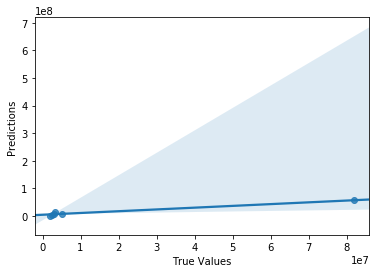

In [42]:
# create training and testing vars
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
## The line / model
sns.regplot(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', model.score(X_test, y_test))

In [43]:
#leave one out cross validation for linear regression
#https://www.ritchieng.com/machine-learning-cross-validation/
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train.shape, y_train.shape)
    #print(X_test.shape, y_test.shape)
   
# Perform 6-fold cross validation
loocv = model_selection.LeaveOneOut()
# fit a model
model = LinearRegression()
results = model_selection.cross_val_score(model, X, y, cv=loocv)
print('Cross-validated scores:', results)

Cross-validated scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


C:\Users\piush\AppData\Local\conda\conda\envs\aind\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
#https://codeburst.io/cross-validation-calculating-r²-and-accuracy-scores-after-loocv-5bd1015a50ec
from sklearn.linear_model import LinearRegression
y_array = y.values
loo = LeaveOneOut()
ytests = []
ypreds = []
prediction___ =[]
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    #print(ypreds)   
    prediction___.append(ypreds[-1:])    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 97.16338%, MSE: 43232675063199.63281


###### In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.

In [45]:
#flatten the list of predictions
flat_predcition_list = [item for sublist in prediction___ for item in sublist]

In [46]:
#Plot true values of 2017 and also the predictions
plt.figure(figsize=(10,4))
sns.regplot(y_array, flat_predcition_list)
plt.xlabel('True Values')
plt.ylabel('Predictions')

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
pd.DataFrame([y_array, flat_predcition_list], columns = df['County'],index = ["2017_values","Predictions"]).T.to_csv("predicted_arrears.csv")